In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
def extract_data(path):
    full_df = pd.read_csv(path)
    data_matrix = pd.DataFrame().assign(F1 = full_df['Formant 1'], F2 = full_df['Formant 2'], F3 = full_df['Formant 3'])
    data_labels = pd.DataFrame().assign(Phoneme_Label = full_df['Vowel Phoneme'])
    
    return data_matrix, data_labels

In [3]:
data_matrix, data_labels = extract_data("ICS2203 & ARI2203 Speech Recognition Assignment - Feature Extraction.csv")

In [4]:
def split_f_values(X_train, X_test):
    f1_train = pd.DataFrame().assign(F1 = X_train['F1'])
    f1_test = pd.DataFrame().assign(F1 = X_test['F1'])
    f2_train = pd.DataFrame().assign(F2 = X_train['F2'])
    f2_test = pd.DataFrame().assign(F2 = X_test['F2'])
    f3_train = pd.DataFrame().assign(F3 = X_train['F3'])
    f3_test = pd.DataFrame().assign(F3 = X_test['F3'])
    
    return f1_train, f1_test, f2_train, f2_test, f3_train, f3_test

In [5]:
def run_classifier(data_matrix, data_labels):
    knn = KNeighborsClassifier() # k = 5 by default

    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(data_matrix, data_labels, test_size=0.25, random_state=i)

        f1_train, f1_test, f2_train, f2_test, f3_train, f3_test = split_f_values(X_train, X_test)
        
        knn.fit(f1_train, np.ravel(y_train))
        predicted_f1 = knn.predict(f1_test)
        cm_f1 = confusion_matrix(y_test, predicted_f1, labels=knn.classes_)

        knn.fit(f2_train, np.ravel(y_train))
        predicted_f2 = knn.predict(f2_test)
        cm_f2 = confusion_matrix(y_test, predicted_f2, labels=knn.classes_)

        knn.fit(f3_train, np.ravel(y_train))
        predicted_f3 = knn.predict(f3_test)
        cm_f3 = confusion_matrix(y_test, predicted_f3, labels=knn.classes_)

        print("Confusion Matrices for Iteration " + str(i) + ":")

        sns.heatmap(cm_f1, annot=True, fmt='g', xticklabels=knn.classes_, yticklabels=knn.classes_)
        plt.title('Confusion Matrix F1',fontsize=16)
        plt.ylabel('Actual',fontsize=12)
        plt.xlabel('Prediction',fontsize=12)
        plt.show()

        sns.heatmap(cm_f2, annot=True, fmt='g', xticklabels=knn.classes_, yticklabels=knn.classes_)
        plt.title('Confusion Matrix F2',fontsize=16)
        plt.ylabel('Actual',fontsize=12)
        plt.xlabel('Prediction',fontsize=12)
        plt.show()

        sns.heatmap(cm_f3, annot=True, fmt='g', xticklabels=knn.classes_, yticklabels=knn.classes_)
        plt.title('Confusion Matrix F3',fontsize=16)
        plt.ylabel('Actual',fontsize=12)
        plt.xlabel('Prediction',fontsize=12)
        plt.show()

        mean_f1_score = (f1_score(y_test, predicted_f1, average='micro') + 
                         f1_score(y_test, predicted_f2, average='micro') + 
                         f1_score(y_test, predicted_f3, average='micro')) / 3

        print("Mean F1 Score for this Iteration: " + str(mean_f1_score) + "\n")

Confusion Matrices for Iteration 0:


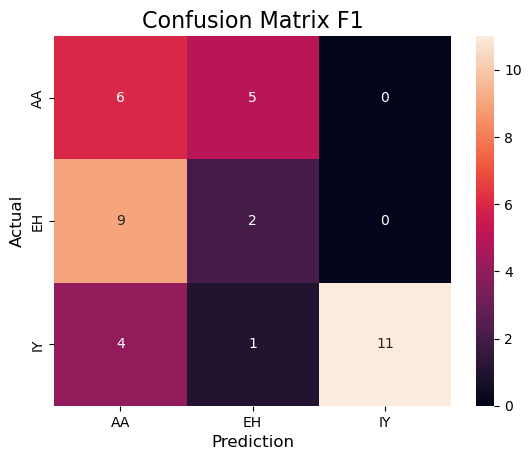

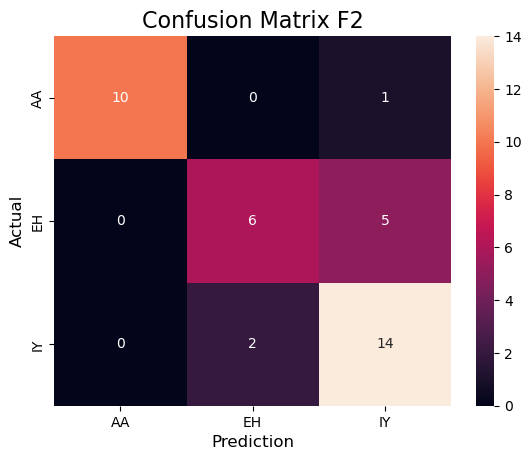

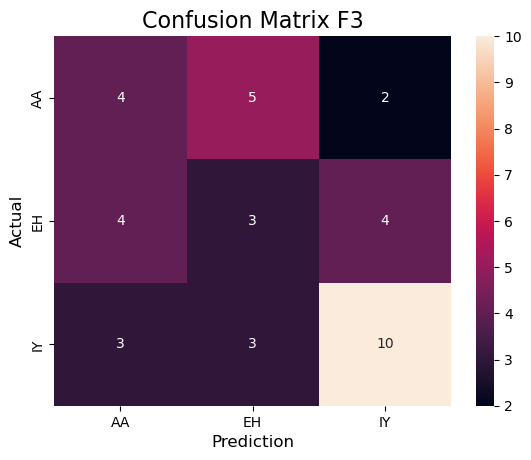

Mean F1 Score for this Iteration: 0.5789473684210527

Confusion Matrices for Iteration 1:


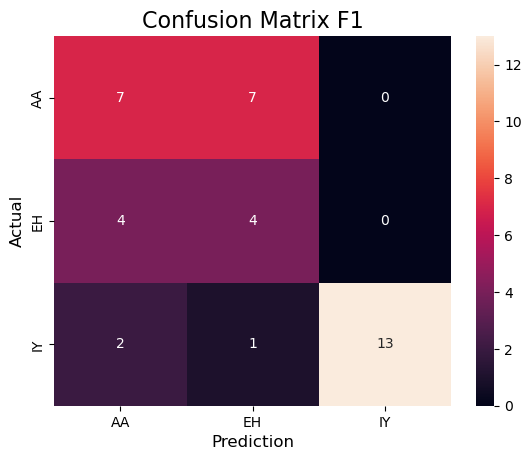

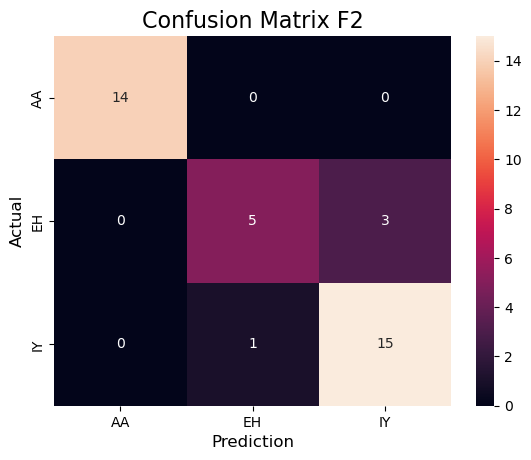

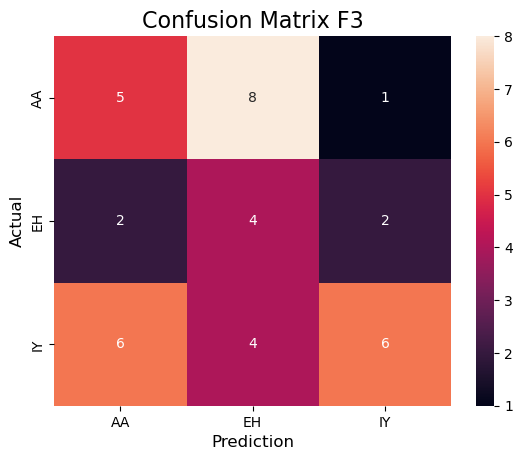

Mean F1 Score for this Iteration: 0.6403508771929824

Confusion Matrices for Iteration 2:


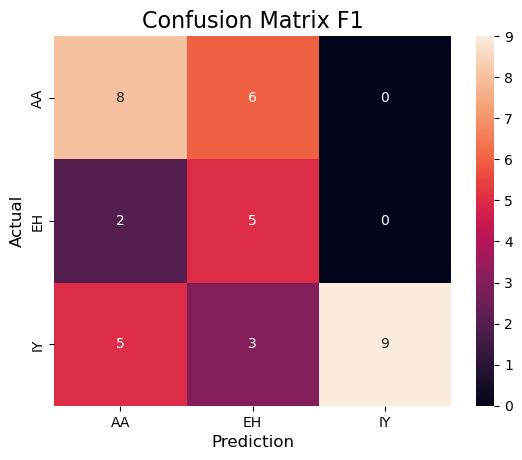

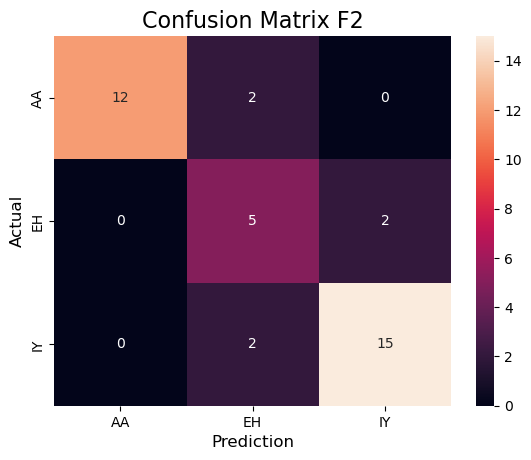

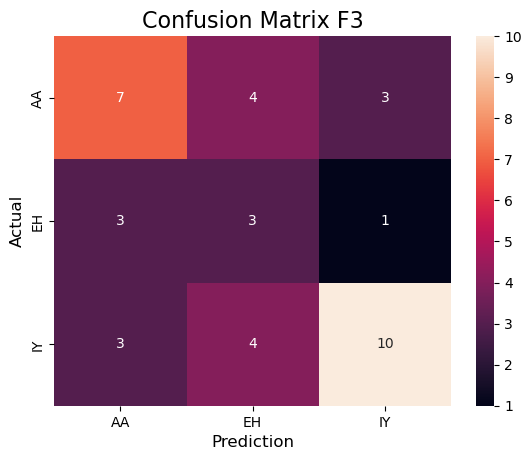

Mean F1 Score for this Iteration: 0.6491228070175438

Confusion Matrices for Iteration 3:


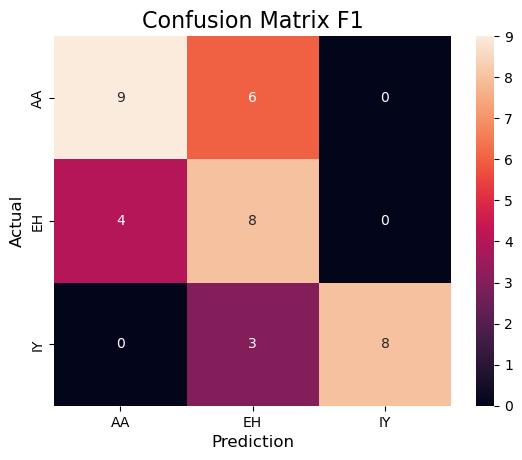

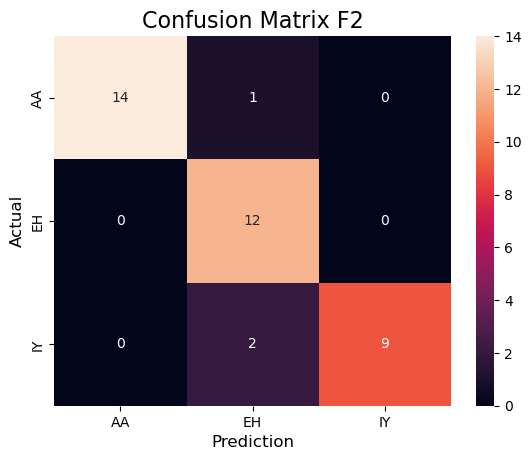

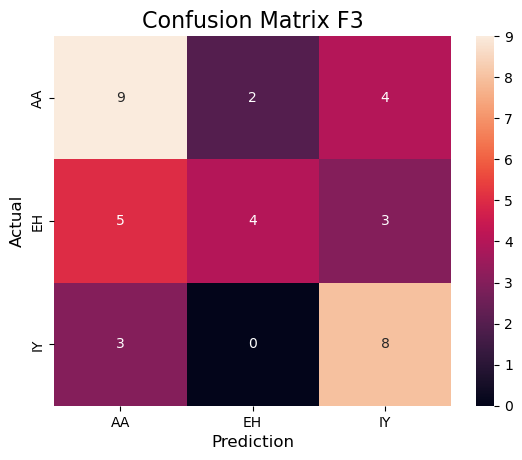

Mean F1 Score for this Iteration: 0.7105263157894738

Confusion Matrices for Iteration 4:


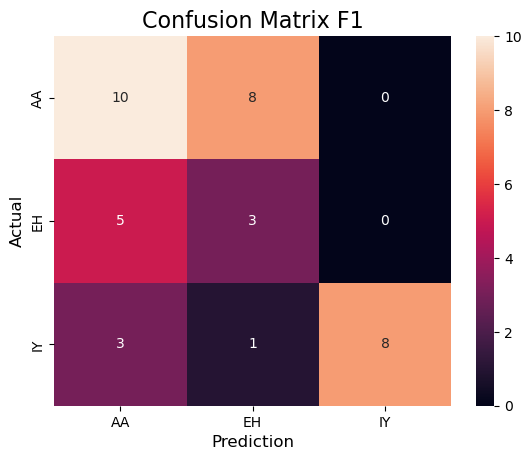

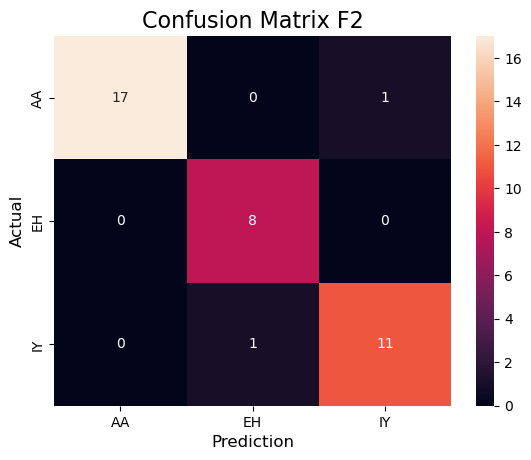

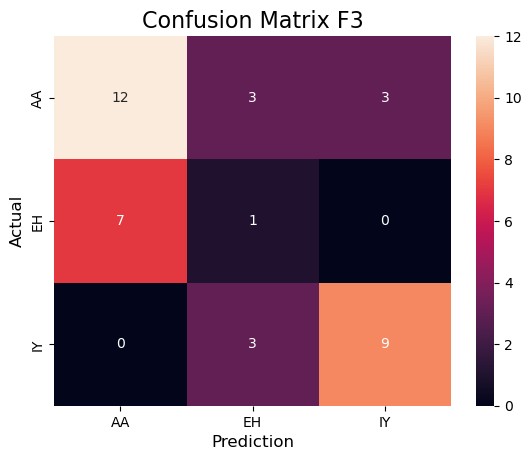

Mean F1 Score for this Iteration: 0.6929824561403509



In [6]:
run_classifier(data_matrix, data_labels)

In [7]:
def plot_k_graph(x_values, y_values):
    plt.plot(x_values, y_values)
    plt.xlabel('Value of K')
    plt.ylabel('F1 Score')
    plt.title("The Effect of the Value of K on the F1 Score")
    plt.show()

In [8]:
def run_classifier_changing_k():
    k_values = []
    f1_scores = []
    for k in range(1, 51):
        k_values.append(k)
        knn = KNeighborsClassifier(n_neighbors=k)
        for i in range(5):
            X_train, X_test, y_train, y_test = train_test_split(data_matrix, data_labels, test_size=0.25, random_state=i)
            
            f1_train, f1_test, f2_train, f2_test, f3_train, f3_test = split_f_values(X_train, X_test)

            knn.fit(f1_train, np.ravel(y_train))
            predicted_f1 = knn.predict(f1_test)

            knn.fit(f2_train, np.ravel(y_train))
            predicted_f2 = knn.predict(f2_test)

            knn.fit(f3_train, np.ravel(y_train))
            predicted_f3 = knn.predict(f3_test)
            
            mean_f1_scores_iterations = []

            mean_f1_score = (f1_score(y_test, predicted_f1, average='micro') + 
                             f1_score(y_test, predicted_f2, average='micro') + 
                             f1_score(y_test, predicted_f3, average='micro')) / 3
            
            mean_f1_scores_iterations.append(mean_f1_score)
            
        f1_scores.append(sum(mean_f1_scores_iterations) / len(mean_f1_scores_iterations))
    plot_k_graph(k_values, f1_scores)

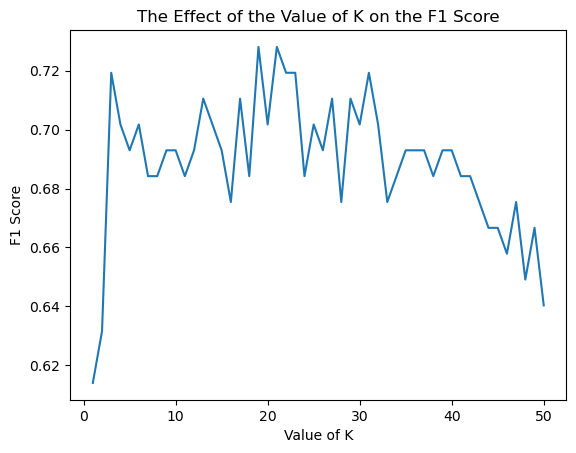

In [9]:
run_classifier_changing_k()